# Music Presence in NYC

This notebook contains some analysis and visualization of data provided by SONYC Urban Sound Tagging that explores various aspects and relationships between music presence, types of music, time, location, and more.


In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

#read in data
annotations_df = pd.read_csv('annotations.csv')
annotations_df.head()

#create a new dataframe that cuts out unncessary columns and contains the information we want to work with related to music presence
musicdf = annotations_df.drop(columns=['annotator_id', '1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
       '1-3_large-sounding-engine_presence',
       '1-X_engine-of-uncertain-size_presence', '2-1_rock-drill_presence',
       '2-2_jackhammer_presence', '2-3_hoe-ram_presence',
       '2-4_pile-driver_presence',
       '2-X_other-unknown-impact-machinery_presence',
       '3-1_non-machinery-impact_presence', '4-1_chainsaw_presence',
       '4-2_small-medium-rotating-saw_presence',
       '4-3_large-rotating-saw_presence',
       '4-X_other-unknown-powered-saw_presence', '5-1_car-horn_presence',
       '5-2_car-alarm_presence', '5-3_siren_presence',
       '5-4_reverse-beeper_presence',
       '5-X_other-unknown-alert-signal_presence','6-3_ice-cream-truck_presence','7-1_person-or-small-group-talking_presence',
       '7-2_person-or-small-group-shouting_presence',
       '7-3_large-crowd_presence', '7-4_amplified-speech_presence',
       '7-X_other-unknown-human-voice_presence',
       '8-1_dog-barking-whining_presence',
       '1-1_small-sounding-engine_proximity',
       '1-2_medium-sounding-engine_proximity',
       '1-3_large-sounding-engine_proximity',
       '1-X_engine-of-uncertain-size_proximity', '2-1_rock-drill_proximity',
       '2-2_jackhammer_proximity', '2-3_hoe-ram_proximity',
       '2-4_pile-driver_proximity',
       '2-X_other-unknown-impact-machinery_proximity',
       '3-1_non-machinery-impact_proximity', '4-1_chainsaw_proximity',
       '4-2_small-medium-rotating-saw_proximity',
       '4-3_large-rotating-saw_proximity',
       '4-X_other-unknown-powered-saw_proximity', '5-1_car-horn_proximity',
       '5-2_car-alarm_proximity', '5-3_siren_proximity',
       '5-4_reverse-beeper_proximity',
       '5-X_other-unknown-alert-signal_proximity',
       '6-1_stationary-music_proximity', '6-2_mobile-music_proximity',
       '6-3_ice-cream-truck_proximity',
       '6-X_music-from-uncertain-source_proximity',
       '7-1_person-or-small-group-talking_proximity',
       '7-2_person-or-small-group-shouting_proximity',
       '7-3_large-crowd_proximity', '7-4_amplified-speech_proximity',
       '7-X_other-unknown-human-voice_proximity',
       '8-1_dog-barking-whining_proximity', '1_engine_presence',
       '2_machinery-impact_presence', '3_non-machinery-impact_presence',
       '4_powered-saw_presence', '5_alert-signal_presence', '7_human-voice_presence','8_dog_presence']).groupby(['split', 'sensor_id', 'audio_filename', 'borough',
       'block', 'latitude', 'longitude', 'year', 'week', 'day', 'hour']).sum()>0
musicdf = musicdf.reset_index()
print(musicdf.head())

#count the occurrences of music presence and print the results
validate = musicdf[(musicdf['split']=='validate') & (musicdf['6_music_presence'] == True)].count()
training = musicdf[(musicdf['split']=='train') & (musicdf['6_music_presence'] == True)].count()
test = musicdf[(musicdf['split']=='test') & (musicdf['6_music_presence'] == True)].count()

print('There are '+ str(validate) + ' occurrences of training music examples')
print('There are '+ str(training) + ' occurrences of validation music examples')
print('There are '+ str(test) + ' occurrences of testing music examples')


   split  sensor_id audio_filename  borough  block   latitude  longitude  \
0  train          1  01_000006.wav        1    541  40.730329 -73.998697   
1  train          1  01_000038.wav        1    541  40.730329 -73.998697   
2  train          1  01_000061.wav        1    541  40.730329 -73.998697   
3  train          1  01_000126.wav        1    541  40.730329 -73.998697   
4  train          1  01_000143.wav        1    541  40.730329 -73.998697   

   year  week  day  hour  6-1_stationary-music_presence  \
0  2017    17    0    10                          False   
1  2017    21    2    17                          False   
2  2017    27    5    20                           True   
3  2017    19    1     1                          False   
4  2016    49    1    10                          False   

   6-2_mobile-music_presence  6-X_music-from-uncertain-source_presence  \
0                      False                                     False   
1                      False            

One aspect of each sample is the borough that it is located in. I was curious to see how much data was found in each borough. There are only three that were explored in this dataset; Manhattan, Brooklyn, and Queens.

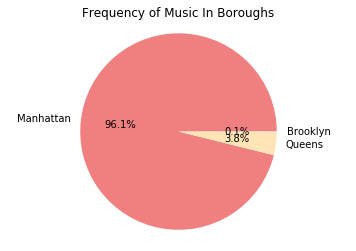

<Figure size 207360x20736 with 0 Axes>

In [2]:
#plot by borough

#find and tally occurrences in each borough
borough_freq = musicdf['borough'].value_counts()
my_labels = 'Manhattan','Queens','Brooklyn'

#plot
my_colors = ['lightcoral','moccasin','lightcyan']
plt.pie(borough_freq, labels = my_labels, autopct = '%1.1f%%', colors = my_colors)
plt.title('Frequency of Music In Boroughs')
plt.axis('equal')
plt.figure(figsize=(2880,288))
plt.show()


Text(0.5,1,'Presence of Music from 2016-2019')

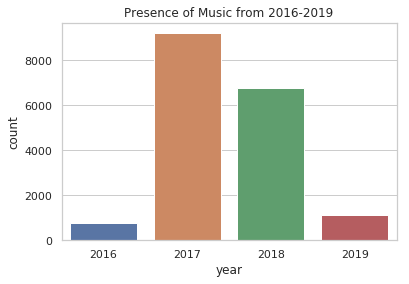

In [3]:
#plot frequency of music samples by the year

sns.set(style="whitegrid")
sns.countplot(x ='year', data = musicdf)
plt.title('Presence of Music from 2016-2019')

Text(0.5,1,'Presence of Music throughout the year')

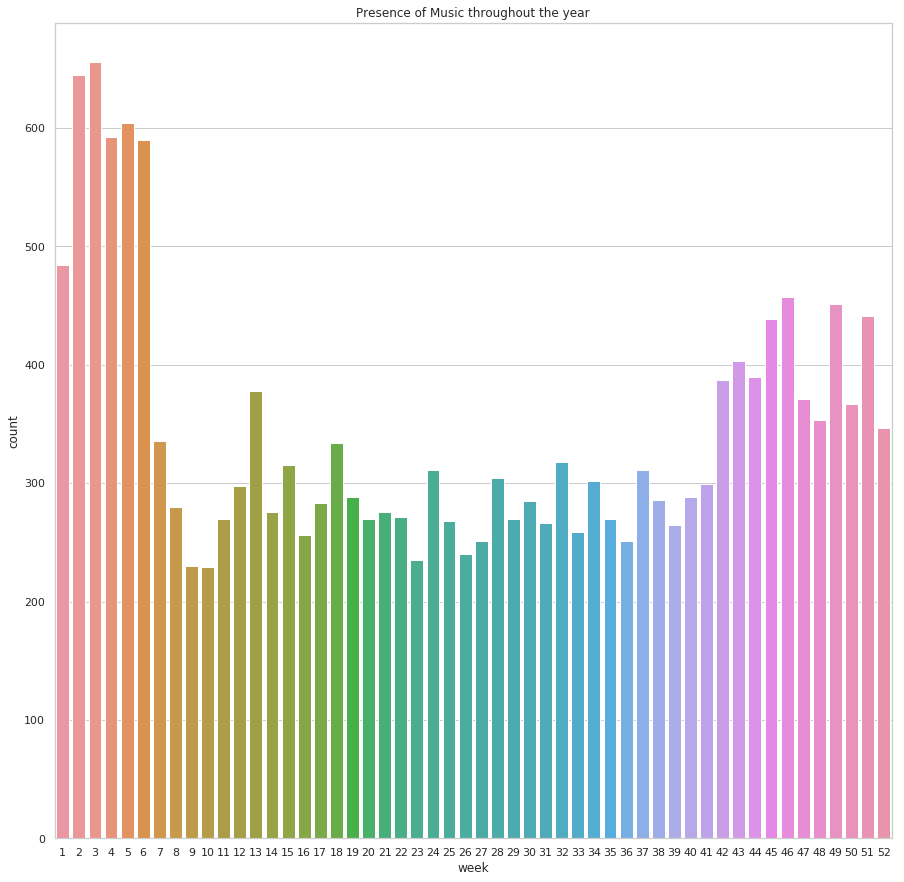

In [4]:
#plot frequency of music samples throughout the year

plt.figure(figsize=(15,15))
sns.countplot(x ='week', data=musicdf)
plt.title('Presence of Music throughout the year')

Text(0.5,1,'Presence of Music from Sunday-Saturday')

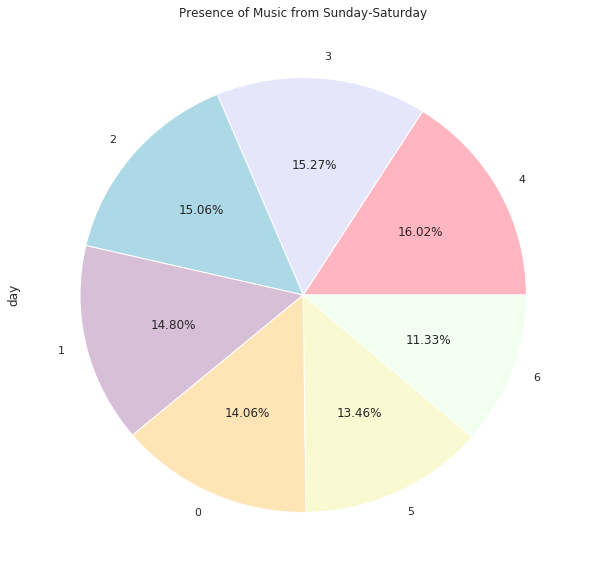

In [5]:
#plot frequency of music samples throughout the week

plt.figure(figsize=(10,10))

#select colors
colors = ['lightpink','lavender','lightblue', 'thistle', 'moccasin','lightgoldenrodyellow', 'honeydew']

#count music frequency for each day
ax = musicdf['day'].value_counts()

#plot data using information above
ax.plot.pie(colors = colors, autopct='%.2f%%')
plt.title('Presence of Music from Sunday-Saturday')


Text(0.5,1,'Presence of Music throughout the Day')

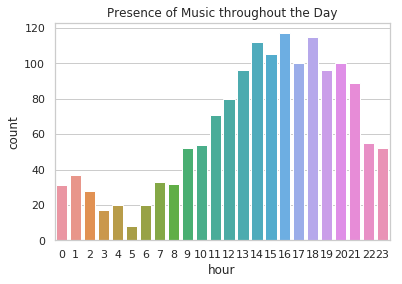

In [6]:
#plot frequency of music samples throughout the day

df1 = musicdf[musicdf['6_music_presence'] == True] 

sns.set(style="whitegrid")
sns.countplot(x ='hour', data=df1)
plt.title('Presence of Music throughout the Day')

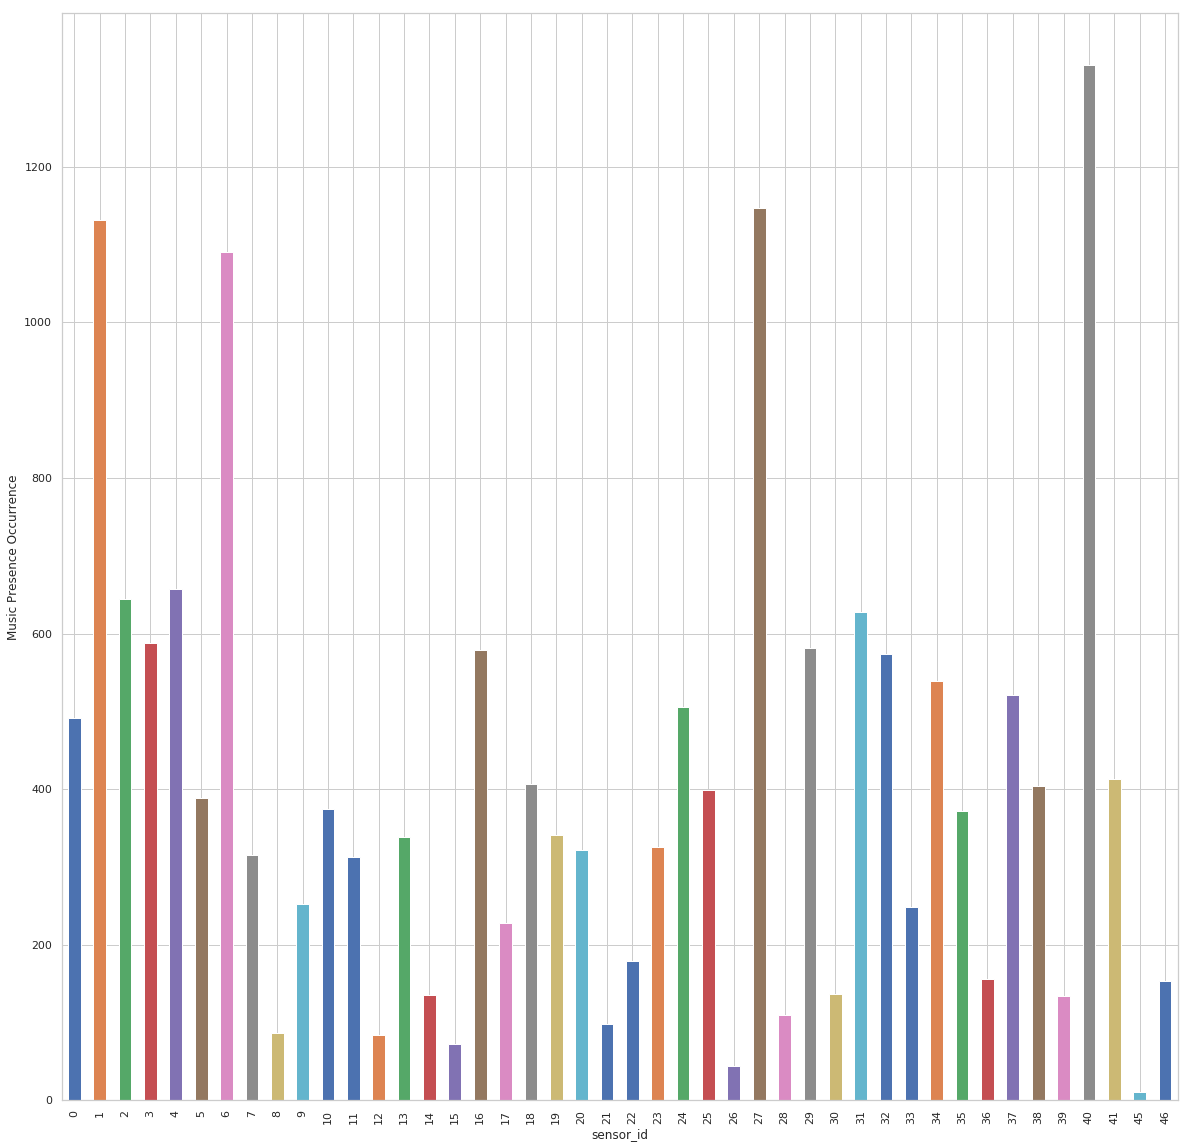

In [7]:
#Map how many music samples each sensor captured

#set graph title and labels 
plt.figure(figsize=(20,20))
plt.xlabel('Sensor')
plt.ylabel('Music Presence Occurrence')

#count music frequency for each sensor
musicdf.groupby('sensor_id')['6_music_presence'].count().plot.bar()


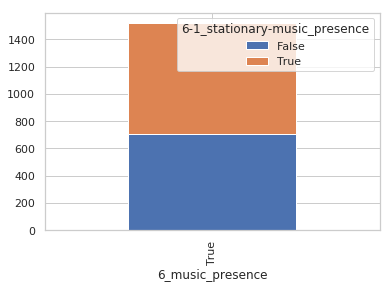

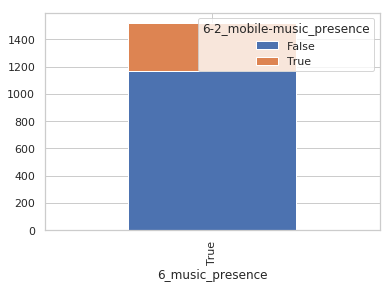

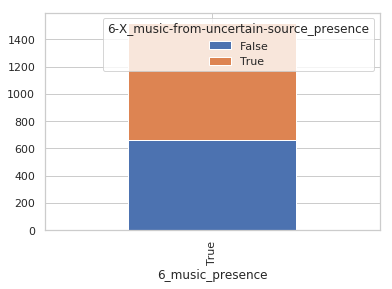

In [8]:
#Plot ratio of types of music to all occurrences of music

#find instances where music was present
df = musicdf[musicdf['6_music_presence'] == True] 

#make stacked bar plot for each occurrence
df.groupby(['6_music_presence','6-1_stationary-music_presence']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['6_music_presence','6-2_mobile-music_presence']).size().unstack().plot(kind='bar', stacked=True)
df.groupby(['6_music_presence','6-X_music-from-uncertain-source_presence']).size().unstack().plot(kind='bar', stacked=True)

Text(0,0.5,'')

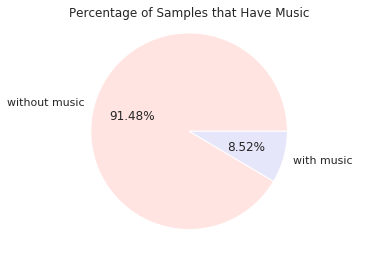

In [9]:
#Find what percentage of samples are music
values = musicdf['6_music_presence'].value_counts()

#plot the data 
my_color = ['mistyrose', 'lavender']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')

#adjust graph title, shape, and labels
plt.title('Percentage of Samples that Have Music')
plt.axis('equal')
plt.ylabel('')

Text(0,0.5,'')

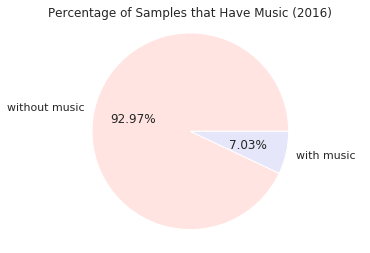

In [35]:
#Plot percentage of music samples by year (2016)

#reduce df to include only rows from 2016
df2 = musicdf.loc[musicdf['year'] == 2016]

values = df2['6_music_presence'].value_counts()

my_color = ['mistyrose', 'lavender']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')
plt.title('Percentage of Samples that Have Music (2016)')
plt.axis('equal')
plt.ylabel('')




Text(0,0.5,'')

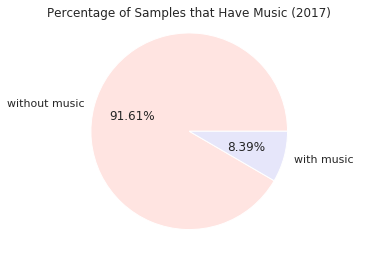

In [34]:
#Plot percentage of music samples by year (2017)

#reduce df to include only rows from 2017
df2 = musicdf.loc[musicdf['year'] == 2017]

values = df2['6_music_presence'].value_counts()

my_color = ['mistyrose', 'lavender']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')
plt.title('Percentage of Samples that Have Music (2017)')
plt.axis('equal')
plt.ylabel('')



Text(0,0.5,'')

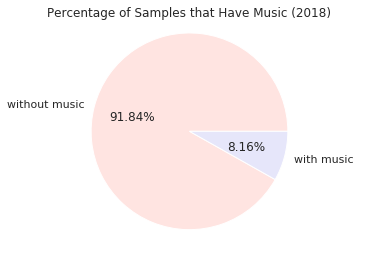

In [36]:
#Plot percentage of music samples by year (2018)

#reduce df to include only rows from 2018
df2 = musicdf.loc[musicdf['year'] == 2018]

values = df2['6_music_presence'].value_counts()

my_color = ['mistyrose', 'lavender']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')
plt.title('Percentage of Samples that Have Music (2018)')
plt.axis('equal')
plt.ylabel('')

Text(0,0.5,'')

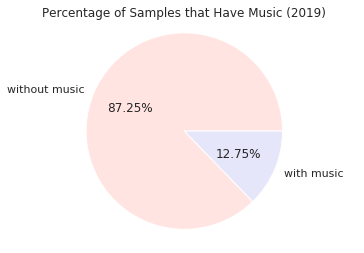

In [33]:
#Plot percentage of music samples by year (2019)

#reduce df to include only rows from 2019
df2 = musicdf.loc[musicdf['year'] == 2019]

values = df2['6_music_presence'].value_counts()

my_color = ['mistyrose', 'lavender']
values.plot.pie(colors = my_color, labels = ['without music', 'with music'], autopct='%.2f%%')
plt.title('Percentage of Samples that Have Music (2019)')
plt.axis('equal')
plt.ylabel('')


          split  sensor_id audio_filename  borough  block   latitude  \
2         train          1  01_000061.wav        1    541  40.730329   
6         train          1  01_000159.wav        1    541  40.730329   
12        train          1  01_000227.wav        1    541  40.730329   
19        train          1  01_000392.wav        1    541  40.730329   
22        train          1  01_000443.wav        1    541  40.730329   
45        train          1  01_000914.wav        1    541  40.730329   
67        train          1  01_001303.wav        1    541  40.730329   
75        train          1  01_001435.wav        1    541  40.730329   
92        train          1  01_001594.wav        1    541  40.730329   
93        train          1  01_001610.wav        1    541  40.730329   
97        train          1  01_001658.wav        1    541  40.730329   
98        train          1  01_001667.wav        1    541  40.730329   
106       train          1  01_001778.wav        1    541  40.73

/share/apps/anaconda3/5.3.1/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: could not convert string to float: '46_020853.wav'

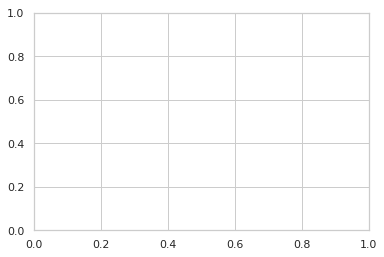

In [21]:
df = musicdf[musicdf['6_music_presence'] == True]

print(df)
pd.melt(df, id_vars=['6_music_presence'], value_vars=['6-1_stationary-music_presence','6-2_mobile-music_presence',' 6-X_music-from-uncertain-source_presence'])

sns.kdeplot(x = '6-1_stationary-music_presence', y ='6-2_mobile-music_presence', data = musicdf)

sb.jointplot(x = '6_music_presence',y = '6-2_mobile_music_presence',data = df)

plt.show()